# FEMA Flood Insurance Policy EDA and Analysis
Rachael Hobbs </br>
11-24-2025 </br>
CPS 285 Dr. Li 

In [95]:
%run flood_helpers.ipynb
# .ipynb file with import packages and def functions to help clean up main notebook

## Introduction

The dataset, obtained from FEMA’s National Flood Insurance Policy Database on [Kaggle](https://www.kaggle.com/datasets/lynma01/femas-national-flood-insurance-policy-database) provides structured information about policies under the National Flood Insurance Program (NFIP). Created by Congress, the NFIP helps reduce flood-related losses through data-driven risk assessment, floodplain management, and accessible insurance coverage. This data captures key attributes of issued policies, including risk metrics and policy characteristics.

The original FEMA National Flood Insurance Policy Database contains over 50 million observations and 45 features, encompassing detailed flood insurance data nationwide. For this project, I created a focused subset to extract key features most relevant to flood risk analysis.
[Source](https://www.fema.gov/openfema-data-page/fima-nfip-redacted-policies-v2)

Included Feature Categories:

* Risk and Geospatial: Flood zone, elevation measures, location identifiers (ZIP code, county, census tract, state, city), and building type indicators.

* Policy: Total coverage, premiums, deductibles, and policy effective or termination dates.

### 1. Import Data

#### Load Flood Insurance Policy Data and Rename Columns

In [96]:
flood_policies = load_data("nfip-flood-policies.csv")
flood_policies.shape

(10000000, 45)

In [97]:
flood_policies.head(5)

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,federalpolicyfee,floodzone,hfiaasurcharge,houseofworshipindicator,latitude,locationofcontents,longitude,lowestadjacentgrade,lowestfloorelevation,nonprofitindicator,numberoffloorsininsuredbuilding,obstructiontype,occupancytype,originalconstructiondate,originalnbdate,policycost,policycount,policyeffectivedate,policyterminationdate,policytermindicator,postfirmconstructionindicator,primaryresidenceindicator,propertystate,reportedzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,NaN,NaN,2.0,NaN,3.301304e+10,N,N,33013.0,0.00,0,0,N,NaN,999,13,X,0,NaN,43.3,Basement/Enclosure/Crawlspace/Subgrade Crawlsp...,-71.8,NaN,NaN,NaN,2.0,NaN,1.0,1974-12-30,2008-08-19,388,1,2009-08-19,2010-08-19,1.0,N,Y,NH,3278.0,7,R,WARNER,NaN,250000,100000,375
1,NaN,NaN,0.0,NaN,2.206304e+10,N,N,22063.0,0.05,1,1,N,NaN,999,35,AE,0,NaN,30.5,Lowest floor only above ground level (No basem...,-91.0,NaN,NaN,NaN,1.0,NaN,3.0,1974-07-01,1997-10-04,315,1,2009-10-04,2010-10-04,1.0,N,Y,LA,70726.0,1,R,DENHAM SPRINGS,NaN,16400,8800,280
2,NaN,NaN,0.0,NaN,4.505106e+10,N,N,45051.0,0.00,0,0,N,1,999,13,X,0,NaN,33.7,Lowest floor only above ground level (No basem...,-79.0,NaN,NaN,NaN,1.0,NaN,1.0,2003-07-01,2005-08-13,348,1,2009-08-13,2010-08-13,1.0,Y,Y,SC,29579.0,7,R,MYRTLE BEACH,NaN,250000,100000,335
3,NaN,519.0,2.0,2016-04-01,1.055001e+09,N,N,1055.0,0.00,1,1,Y,NaN,-2,35,AE,0,NaN,34.0,NaN,-86.0,517.3,517.3,NaN,3.0,50,1.0,1989-01-01,2006-04-14,951,1,2009-04-14,2010-04-14,1.0,Y,Y,AL,35901.0,2,R,GADSDEN,NaN,174900,21000,916
4,NaN,7.0,0.0,NaN,1.208600e+10,N,N,12086.0,0.00,0,0,N,3,0,35,A10,0,NaN,26.0,Lowest floor only above ground level (No basem...,-80.1,NaN,6.9,NaN,1.0,NaN,1.0,1957-07-01,1996-04-04,1323,1,2009-04-04,2010-04-04,1.0,N,Y,FL,33160.0,1,R,GOLDEN BEACH,NaN,250000,100000,1288


In [98]:
policies_df = rename_flood_columns(flood_policies)
for col in policies_df.columns:
    print(col)

agriculture_structure_indicator
base_flood_elevation
basement_enclosure_crawlspace_type
cancellation_date_of_flood_policy
census_tract
condominium_indicator
construction
county_code
crs_discount
deductible_amount_in_building_coverage
deductible_amount_in_contents_coverage
elevated_building_indicator
elevation_certificate_indicator
elevation_difference
federal_policy_fee
flood_zone
hfiaa_surcharge
house_of_worship_indicator
latitude
location_of_contents
longitude
lowest_adjacent_grade
lowest_floor_elevation
non_profit_indicator
number_of_floors_in_insured_building
obstruction_type
occupancy_type
original_construction_date
original_nb_date
policy_cost
policy_count
policy_effective_date
policy_termination_date
policy_term_indicator
post_firm_construction_indicator
primary_residence_indicator
property_state
reported_zipcode
rate_method
regular_emergency_program_indicator
reported_city
small_business_indicator_building
total_building_insurance_coverage
total_contents_insurance_coverage
tota

#### Create New Feature

How much is the premium per \$1000 of coverage </br>
</br>
$
\text{Premium Rate} = \frac{\text{Total Premium}}{\text{Total Coverage (Building and Contents)}} * \$1000
$

In [99]:
total_coverage = policies_df['total_building_insurance_coverage'] + policies_df['total_contents_insurance_coverage']
premium = policies_df['total_insurance_premium_of_the_policy']

# Use Where numpy feature to take care of division by zero
policies_df['premium_rate'] = np.where(total_coverage == 0,
                                            np.nan,
                                            premium * 1000 / total_coverage)

### 2. Pre-Processing


Clean Flood Insurance Policy Dataset
- removing duplicates
- filling missing values
- removing missing values

In [100]:
policies_dup_count = policies_df.duplicated().sum()
print("Duplicate Policies Dropped:", policies_dup_count)
policies_df = policies_df.drop_duplicates().copy()

Duplicate Policies Dropped: 199913


In [101]:
policies_df['elevation_difference'] = policies_df['elevation_difference'].replace(999, pd.NA)

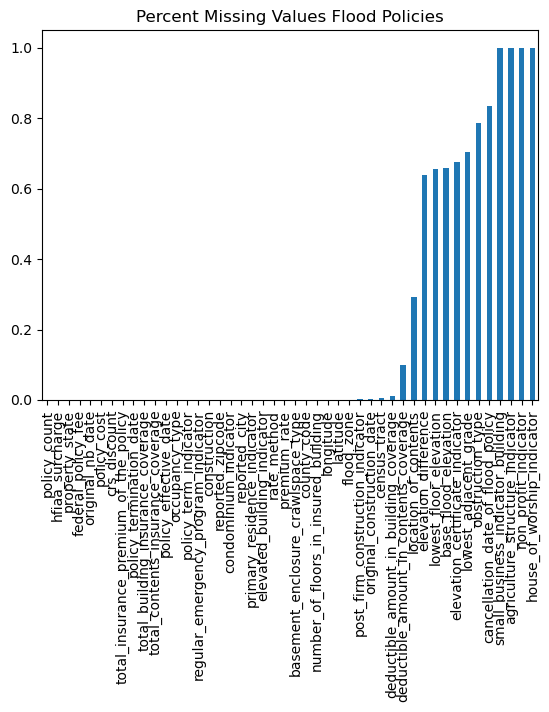

In [102]:
# Percentage NA Values
plt.figure()
na_percents=policies_df.isna().sum()/len(policies_df)
na_percents.sort_values().plot(kind="bar")
plt.title("Percent Missing Values Flood Policies")
plt.show()

There are many building types with missing values and cancellation date is also mostly na.
Select Subset of Columns, dropping these types will all and mostly missing values.

In [103]:
# Helper function filters data to subset of features
df_subset = flood_subset(policies_df).copy()

Fill Columns with large percentage of Missing Values with "Unknown" value.

In [104]:
# Fill cancellation date with "Unknown"
df_subset['cancellation_date_of_flood_policy'] = df_subset['cancellation_date_of_flood_policy'].fillna("Unknown")
df_subset['elevation_difference'] = df_subset['elevation_difference'].fillna("Unknown")

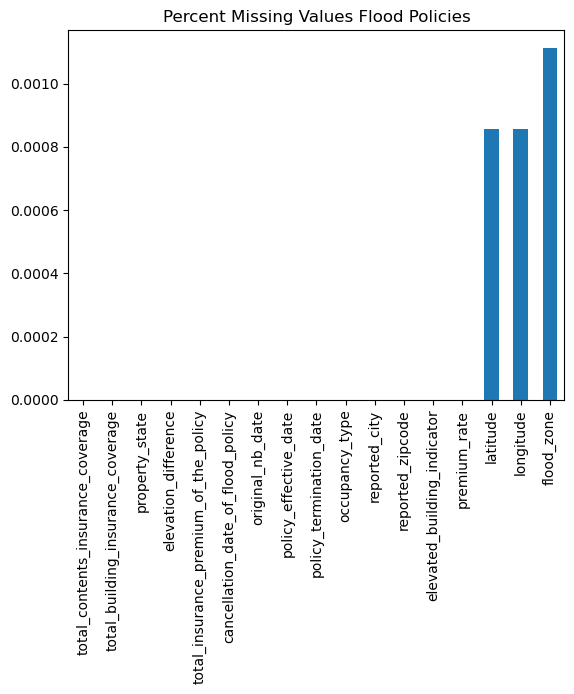

In [105]:
# Percentage NA Values
plt.figure()
na_percents = df_subset.isna().sum()/len(df_subset)
na_percents.sort_values().plot(kind="bar")
plt.title("Percent Missing Values Flood Policies")
plt.show()

In [106]:
policies_na_count = df_subset.isna().sum()
print("Policy Missing Values Dropped:\n", policies_na_count)
policies_cleaned = df_subset.dropna().copy()

Policy Missing Values Dropped:
 flood_zone                               10907
latitude                                  8405
longitude                                 8405
property_state                               0
reported_city                                2
elevated_building_indicator                  3
elevation_difference                         0
reported_zipcode                             2
occupancy_type                               1
cancellation_date_of_flood_policy            0
original_nb_date                             0
policy_effective_date                        0
policy_termination_date                      0
total_building_insurance_coverage            0
total_contents_insurance_coverage            0
total_insurance_premium_of_the_policy        0
premium_rate                                 5
dtype: int64


Verify Data Types

In [107]:
# errors handles the "Unknown" filled in earlier for cancellation date. Fills with NA.
policies_cleaned['cancellation_date_of_flood_policy'] = pd.to_datetime(policies_cleaned['cancellation_date_of_flood_policy'], errors='coerce')
policies_cleaned['original_nb_date'] = pd.to_datetime(policies_cleaned['original_nb_date'])
policies_cleaned['policy_effective_date'] = pd.to_datetime(policies_cleaned['policy_effective_date'])
policies_cleaned['policy_termination_date'] = pd.to_datetime(policies_cleaned['policy_termination_date'])
policies_cleaned.info()



C:\Users\hobbs\AppData\Local\Temp\ipykernel_21040\1432088026.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  policies_cleaned['cancellation_date_of_flood_policy'] = pd.to_datetime(policies_cleaned['cancellation_date_of_flood_policy'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 9780771 entries, 0 to 9999999
Data columns (total 17 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   flood_zone                             object        
 1   latitude                               float64       
 2   longitude                              float64       
 3   property_state                         object        
 4   reported_city                          object        
 5   elevated_building_indicator            object        
 6   elevation_difference                   object        
 7   reported_zipcode                       float64       
 8   occupancy_type                         float64       
 9   cancellation_date_of_flood_policy      datetime64[ns]
 10  original_nb_date                       datetime64[ns]
 11  policy_effective_date                  datetime64[ns]
 12  policy_termination_date                datetime64[ns]
 13  to

### FEMA Flood Zone Designations
FEMA works with local communities to create **Flood Insurance Rate Maps**, or FIRMs. These maps identify areas with significant flood risk, especially the Special Flood Hazard Area (SFHA), which has at least a 1 percent annual chance of flooding. 

FIRMs are used to determine which properties must carry flood insurance and to guide the floodplain management standards that communities must follow under the NFIP. [Source](https://www.congress.gov/crs-product/IF10988)

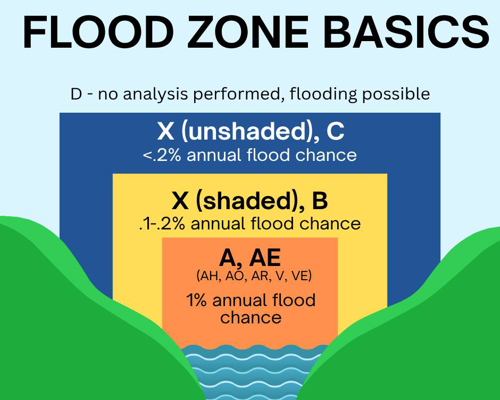

In [108]:
img = Image.open('flood_zones.jpg')
img_resized = img.resize((500,400))
display(img_resized)

The type of flood zone that you are in affects the cost of flood insurance policies and flood insurance is mandatory in some flood zones. Special Flood Hazard Areas (SFHAs) are the areas that are at the greatest risk of flooding, mudflow, or flood-related erosion. [Source](https://climatecheck.com/risks/flood/what-are-the-flood-zones-in-fema-maps) [Image](https://www.facebook.com/photo.php?fbid=1130131662476675&set=a.225495822940268&id=100064395561449)


In [109]:
policies_cleaned['flood_zone'].unique()

array(['X', 'AE', 'A10', 'A02', 'A06', 'A08', 'C', 'B', 'AHB', 'VE', 'A',
       'A01', 'V14', 'A05', 'AO', 'AH', 'A04', 'A07', 'A14', 'A12', 'A15',
       'A13', 'A03', 'AOB', 'A17', 'A11', 'V12', 'D', 'A09', 'V10', 'A16',
       'A99', 'V20', 'A18', 'V06', 'A20', 'V19', 'A28', 'V09', 'V15',
       'V01', 'AR', 'V11', 'V13', 'V21', 'A22', 'V05', 'A19', 'A23',
       'A21', 'V08', 'V17', 'V04', 'A0B', 'V', 'V16', 'V18', 'V07', 'V02',
       'V03', 'V27', 'A27', 'A30', 'V23', 'V22', 'A24', 'V24', 'A25',
       'A26', 'V30', 'A29', 'A00', 'V29', 'V28', 'ALT'], dtype=object)

#### Create new Columns for different Flood Zone Destinations
Combined Moderate and Low as X is in both </br>
Handled extra values need to be filtered, 'EMG' '00X' and '*' as 'undetermined' </br>
Separated High into High (A) and Coastal (V)

In [110]:
mask = policies_cleaned['flood_zone'].str.contains('^A')
policies_cleaned['high_flood_zone'] = False
policies_cleaned.loc[mask, 'high_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^V')
policies_cleaned['coastal_high_flood_zone'] = False
policies_cleaned.loc[mask, 'coastal_high_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^[BCX]')
policies_cleaned['low_moderate_flood_zone'] = False
policies_cleaned.loc[mask, 'low_moderate_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^[*DEn]')
policies_cleaned['undetermined_flood_zone'] = False
policies_cleaned.loc[mask, 'undetermined_flood_zone'] = True
policies_cleaned['floodzone_catagory'] = policies_cleaned[floodzone_types].idxmax(axis=1)
policies_cleaned['floodzone_catagory'] = policies_cleaned['floodzone_catagory'].str.replace(r'_.*', '', regex=True)

### Describe Cleaned Dataset

In [111]:
policies_cleaned.describe()

,latitude,longitude,reported_zipcode,occupancy_type,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate
count,9.780771e+06,9.780771e+06,9.780771e+06,9.780771e+06,1613119,9780771,9780771,9780771,9.780771e+06,9.780771e+06,9.780771e+06,9.780771e+06
mean,3.239567e+01,-8.781157e+01,4.739104e+04,1.298708e+00,2014-02-05 08:41:55.091819520,2005-01-20 04:09:48.794319232,2010-01-05 12:41:51.122284544,2010-12-03 01:23:12.766643200,2.200122e+05,5.119667e+04,6.893522e+02,3.609866e+00
min,-1.430000e+01,-1.707000e+02,0.000000e+00,1.000000e+00,1985-06-19 00:00:00,1984-03-09 00:00:00,2009-01-01 00:00:00,2009-01-02 00:00:00,0.000000e+00,0.000000e+00,-1.045000e+03,-5.225000e+01
25%,2.790000e+01,-9.410000e+01,3.211800e+04,1.000000e+00,2011-12-17 00:00:00,2002-11-25 00:00:00,2009-07-10 00:00:00,2010-06-14 00:00:00,1.198000e+05,0.000000e+00,3.130000e+02,1.117857e+00
50%,3.020000e+01,-8.260000e+01,3.398100e+04,1.000000e+00,2013-12-25 00:00:00,2006-06-29 00:00:00,2009-12-31 00:00:00,2010-11-19 00:00:00,2.000000e+05,4.700000e+04,3.750000e+02,1.742857e+00
75%,3.740000e+01,-8.020000e+01,7.120100e+04,1.000000e+00,2016-03-06 00:00:00,2009-02-08 00:00:00,2010-07-09 00:00:00,2011-06-21 00:00:00,2.500000e+05,1.000000e+05,7.460000e+02,5.522525e+00
max,6.990000e+01,1.457000e+02,9.999900e+04,4.000000e+00,2019-10-07 00:00:00,2013-01-30 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2.122500e+08,1.000000e+06,5.169760e+05,9.940000e+02
std,5.877843e+00,1.344219e+01,2.647776e+04,7.992432e-01,NaN,NaN,NaN,NaN,9.398370e+05,5.612537e+04,1.563415e+03,4.480085e+00


In [112]:
policies_cleaned.describe(include=("object","bool"))

,flood_zone,property_state,reported_city,elevated_building_indicator,elevation_difference,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory
count,9780771,9780771,9780771,9780771,9780771,9780771,9780771,9780771,9780771,9780771
unique,75,56,35397,2,692,2,2,2,2,4
top,X,FL,HOUSTON,N,Unknown,True,False,False,False,high
freq,2829493,3094535,397061,8313327,6239395,5707876,9665802,5828882,9774734,5707876


#### State Counts

In [113]:
state_count = policies_cleaned['property_state'].value_counts()
state_count

property_state
FL    3094535
TX    1353949
LA    1020920
CA     553324
NJ     392249
       ...   
VI       3150
DC       1944
GU        534
AS          5
CM          2
Name: count, Length: 56, dtype: int64

#### Correlation Map

Text(0.5, 1.0, 'Correlation Map for Correlation')

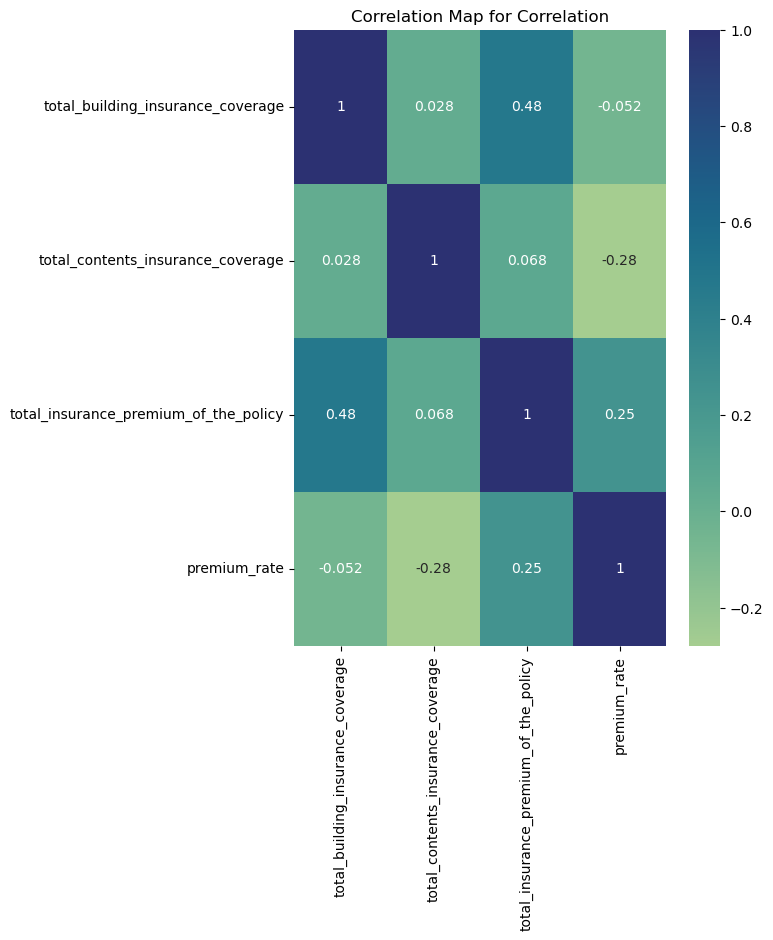

In [114]:
df_numeric = policies_cleaned[numeric_col]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(6,8))
sns.heatmap(correlation_matrix, cmap= "crest", annot=True)
plt.title("Correlation Map for Correlation")

### Create Subsets
Create State Subsets for Michigan and Flordia

In [115]:
df_michigan = policies_cleaned[policies_cleaned['property_state'] == 'MI']
df_michigan.head(5)

,flood_zone,latitude,longitude,property_state,reported_city,elevated_building_indicator,elevation_difference,reported_zipcode,occupancy_type,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory
420,C,43.1,-86.2,MI,SPRING LAKE,N,Unknown,49456.0,1.0,NaT,2007-09-06,2009-09-06,2010-09-06,125000,50000,294,1.680000,False,False,True,False,low
636,X,42.3,-83.3,MI,DEARBORN HGTS,N,Unknown,48125.0,1.0,NaT,1999-08-18,2009-01-12,2010-01-12,172700,0,585,3.387377,False,False,True,False,low
764,C,42.1,-86.4,MI,SAINT JOSEPH,N,Unknown,49085.0,1.0,2010-06-16,1997-06-16,2009-06-16,2010-06-16,150000,60000,283,1.347619,False,False,True,False,low
1161,AE,42.8,-86.2,MI,MACATAWA,N,0,49434.0,4.0,NaT,2007-07-20,2009-07-20,2010-07-20,500000,0,2500,5.000000,True,False,False,False,high
1349,AE,42.3,-83.8,MI,ANN ARBOR,N,Unknown,48103.0,1.0,NaT,2008-04-08,2009-04-08,2010-04-08,70000,0,638,9.114286,True,False,False,False,high


In [116]:
df_flordia = policies_cleaned[policies_cleaned['property_state'] == 'FL']
df_flordia.head(5)

,flood_zone,latitude,longitude,property_state,reported_city,elevated_building_indicator,elevation_difference,reported_zipcode,occupancy_type,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory
4,A10,26.0,-80.1,FL,GOLDEN BEACH,N,0,33160.0,1.0,NaT,1996-04-04,2009-04-04,2010-04-04,250000,100000,1288,3.680000,True,False,False,False,high
9,X,28.0,-82.6,FL,TAMPA,N,Unknown,33607.0,3.0,NaT,2007-09-13,2009-09-13,2010-09-13,43300,10700,419,7.759259,False,False,True,False,low
11,AE,27.8,-80.5,FL,SEBASTIAN,N,0,32958.0,3.0,NaT,2009-12-01,2009-12-01,2010-12-01,269000,0,663,2.464684,True,False,False,False,high
17,C,27.4,-82.5,FL,UNIVERSITY PK,N,Unknown,34201.0,1.0,NaT,2003-05-20,2009-05-20,2010-05-20,150000,60000,283,1.347619,False,False,True,False,low
19,X,30.5,-84.2,FL,TALLAHASSEE,N,Unknown,32308.0,1.0,NaT,2007-07-06,2009-07-06,2010-07-06,250000,100000,335,0.957143,False,False,True,False,low


### 3. EDA
#### Sample Dataset
Created a sample Dataframe with 5000 rows from Flordia and 5000 rows from Michigan.

In [117]:
fl_sample = df_flordia.sample(n= 5000, random_state=42)
mi_sample = df_michigan.sample(n = 5000, random_state=42)
df_sample = pd.concat([fl_sample, mi_sample])
df_sample.head(5)

,flood_zone,latitude,longitude,property_state,reported_city,elevated_building_indicator,elevation_difference,reported_zipcode,occupancy_type,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory
9246487,B,26.5,-80.1,FL,BOYNTON BEACH,N,Unknown,33437.0,1.0,NaT,2009-10-30,2010-10-30,2011-10-30,250000,100000,335,0.957143,False,False,True,False,low
7414663,AHB,26.3,-80.3,FL,CORAL SPRINGS,N,2,33076.0,1.0,2013-10-29,2009-10-29,2010-10-29,2011-10-29,250000,100000,465,1.328571,True,False,False,False,high
6971808,B,26.4,-80.1,FL,DELRAY BEACH,N,Unknown,33484.0,1.0,NaT,2001-03-02,2010-03-02,2011-03-02,20000,8000,106,3.785714,False,False,True,False,low
3324430,C,27.3,-82.5,FL,SARASOTA,N,Unknown,34231.0,1.0,NaT,2006-09-17,2009-09-17,2010-09-17,150000,60000,283,1.347619,False,False,True,False,low
9208619,X,28.4,-80.7,FL,MERRITT ISLAND,N,Unknown,32953.0,1.0,NaT,2003-11-15,2010-11-15,2011-11-15,250000,100000,335,0.957143,False,False,True,False,low


#### Flood Zones Comparisons

Explore different Flood Zones distrubutions for MI and FL

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone US')

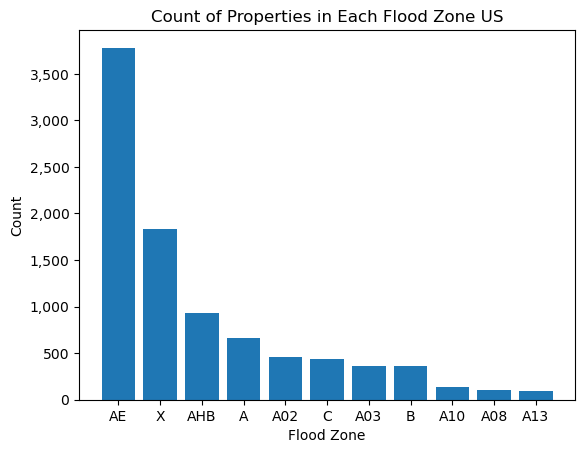

In [118]:
floodzone_counts = df_sample['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values
ax = plt.gca()
plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.title("Count of Properties in Each Flood Zone US")

#### Pair Plots for Sample Data

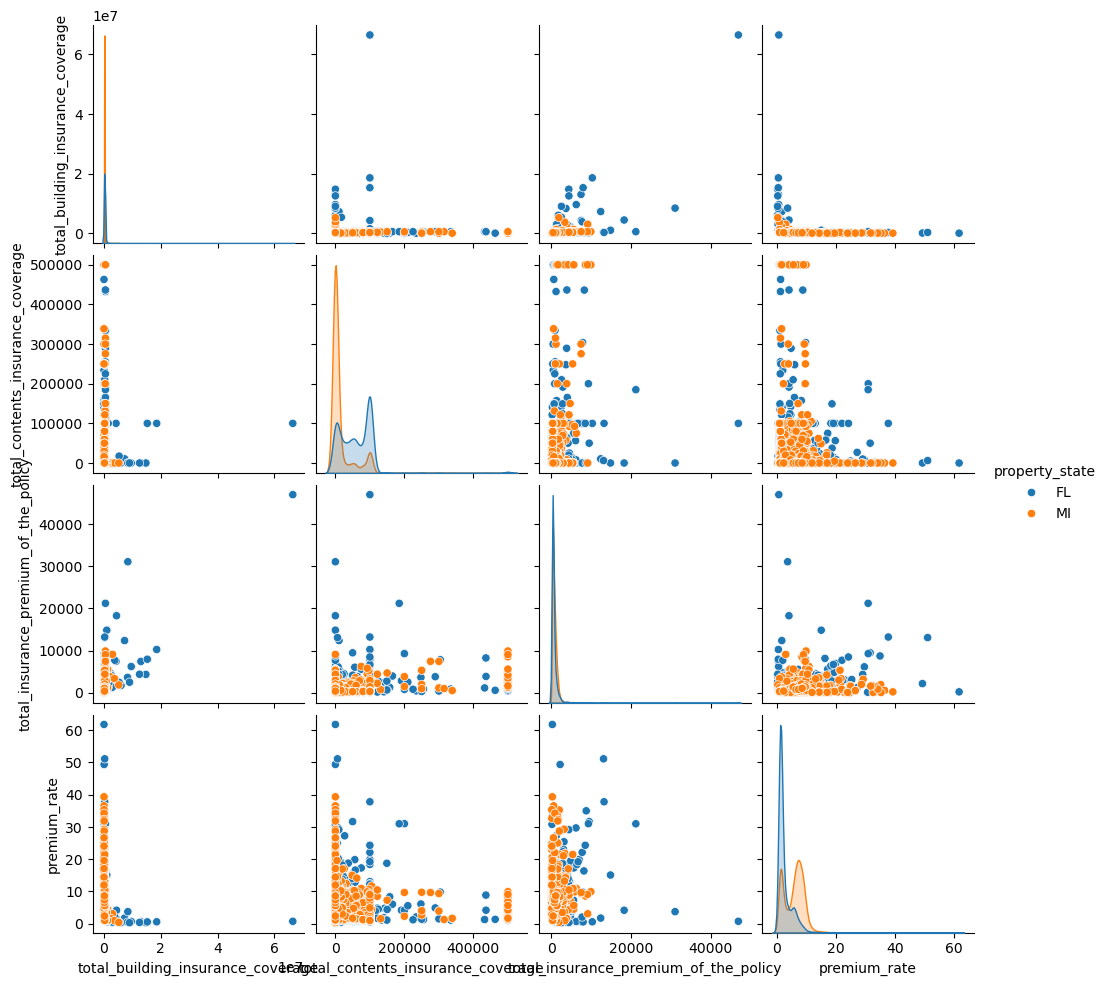

In [119]:
sns.pairplot(df_sample.loc[:,column_names], hue = "property_state", height = 2.5, aspect=1)

#### Description of Sample Data

In [120]:
(df_sample[describe_col].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date
count,2162,10000,10000,10000
mean,2013-11-13 14:29:11.711378432,2004-10-13 13:11:08.159999872,2009-12-30 10:50:26.880000,2010-11-18 07:17:11.039999744
min,1986-06-22 00:00:00,1985-01-18 00:00:00,2009-01-01 00:00:00,2009-01-07 00:00:00
5%,2010-04-29 00:00:00,1993-07-05 20:24:00,2009-02-14 00:00:00,2009-12-08 00:00:00
25%,2011-11-16 06:00:00,2002-04-26 18:00:00,2009-06-29 00:00:00,2010-05-25 00:00:00
50%,2013-10-20 00:00:00,2006-04-19 00:00:00,2009-12-30 00:00:00,2010-11-05 00:00:00
75%,2015-08-25 12:00:00,2009-01-22 00:00:00,2010-07-01 00:00:00,2011-06-03 00:00:00
95%,2018-03-26 22:48:00,2010-07-17 00:00:00,2010-11-18 00:00:00,2011-11-07 00:00:00
99%,2019-04-26 08:09:36,2010-11-30 00:00:00,2010-12-22 00:00:00,2011-12-20 00:14:24
max,2019-08-26 00:00:00,2011-11-22 00:00:00,2011-12-28 00:00:00,2012-12-28 00:00:00


In [121]:
(df_sample[column_names].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
          .apply(lambda s: s.apply('{0:.2f}'.format))
)

,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate
count,10000.00,10000.00,10000.00,10000.00
mean,201926.15,37855.11,707.81,4.32
std,788675.29,52588.87,987.61,3.77
min,0.00,0.00,8.00,0.28
5%,25000.00,0.00,184.00,0.96
25%,102000.00,0.00,323.00,1.29
50%,173000.00,11000.00,438.00,2.90
75%,250000.00,80000.00,852.00,6.91
95%,250000.00,100000.00,1792.00,9.70
99%,662476.00,100000.00,3869.23,14.91


Most variables are extreamly skewed.
Removed extream outliers that were more than 2.5 times the IQR from the quartiles.

In [122]:
df_numeric = df_sample[numeric_col].copy()
df_filtered = df_sample.copy()
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

bool_filter = ((df_numeric >= lower_bound) & (df_numeric <= upper_bound)).all(axis=1)

df_filtered = df_filtered[bool_filter]

#### Describe New Filtered Sample Data

In [141]:
print(f"Dropped Policies: {df_sample.shape[0]-df_filtered.shape[0]}")

Dropped Policies: 63


In [124]:
(df_filtered[column_names]
          .describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
          .apply(lambda s: s.apply('{0:.2f}'.format))
)

,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate
count,9593.00,9593.00,9593.00,9593.00
mean,166907.78,35703.49,595.35,4.11
std,85464.53,41231.97,414.54,3.18
min,0.00,0.00,8.00,0.58
5%,26000.00,0.00,183.00,0.96
25%,100000.00,0.00,314.00,1.28
50%,168900.00,12000.00,425.00,2.68
75%,250000.00,80000.00,792.00,6.79
95%,250000.00,100000.00,1501.40,9.48
99%,466752.00,100000.00,1942.08,11.96


#### Pair Plots for New Filtered Sampled Data

The maximum available coverage limit 
* single-family dwellings: **100,000 dollars for contents** and **up to 250,000 dollars for building coverage**

* residential buildings: **500,000 dollars for building coverage** and **100,000 dollars for contents coverage**

* nonresidential business buildings: **500,000 dollars for building coverage** and **500,000 dollars for contents coverage**


[Source](https://www.congress.gov/crs-product/IF10988)


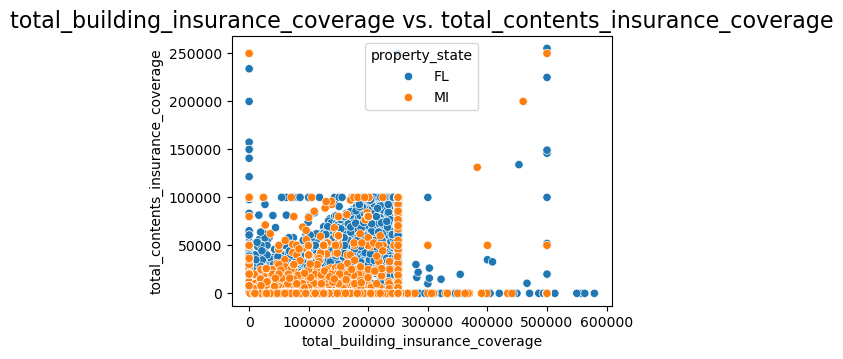

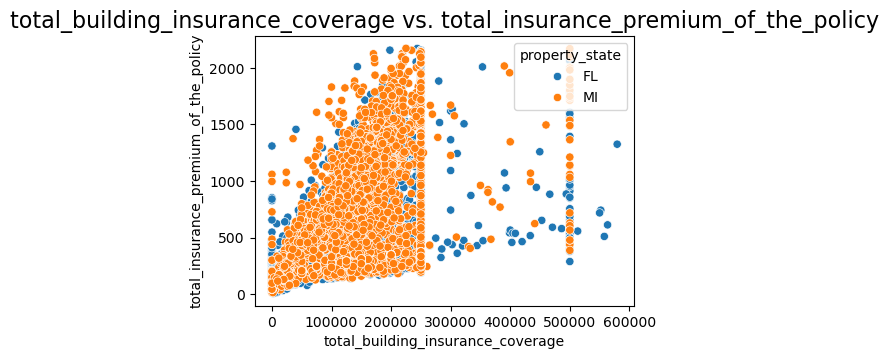

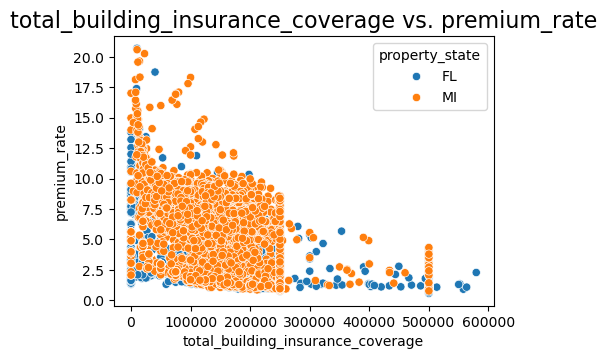

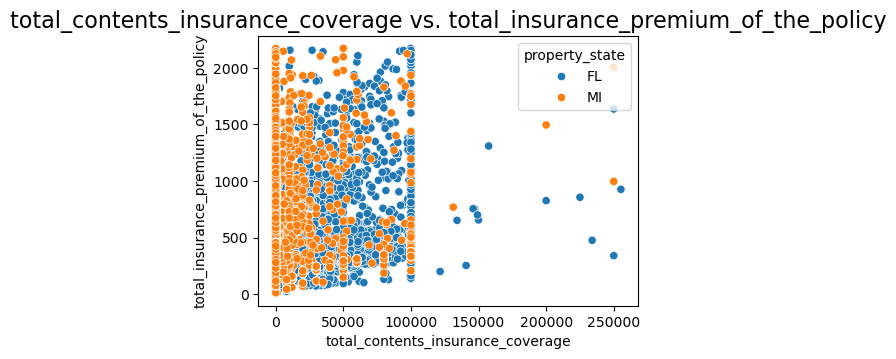

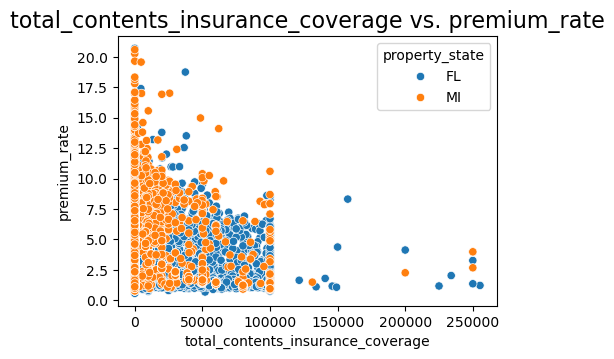

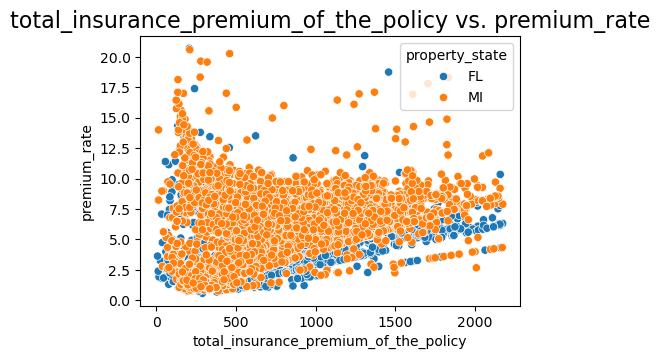

In [125]:
columns_numeric = column_names.copy()
columns_numeric.remove('property_state')
column_pairs = list(itertools.combinations(columns_numeric,2))

for col1, col2 in column_pairs:
    fig_height = 3.5
    fig_width = fig_height * 1.4

    plt.figure(figsize=(fig_width, fig_height))
    ax = sns.scatterplot(
        data = df_filtered,
        x = col1,
        y = col2,
        hue = "property_state"
    )
    ax.set_title(f'{col1} vs. {col2}', fontsize = 16)
    plt.show()


### Analytical Questions

#### Question 1
How does the average premium rate (Premium / Coverage) compare across different flood zone ratings?

In [126]:
df_sample[['total_insurance_premium_of_the_policy', 'floodzone_catagory']].groupby('floodzone_catagory').describe()

total_insurance_premium_of_the_policy               \
                                                   count         mean   
floodzone_catagory                                                      
coastal                                             54.0  4187.037037   
high                                              7315.0   781.461107   
low                                               2630.0   431.171863   
undetermined                                         1.0  1662.000000   

                                                                            
                            std     min      25%     50%      75%      max  
floodzone_catagory                                                          
coastal             5022.744972   135.0  1429.25  2648.5  4792.25  31066.0  
high                 817.389934     8.0   360.00   557.0   973.00  21213.0  
low                 1000.860911    14.0   283.00   335.0   375.00  46963.0  
undetermined                NaN  1662.0  1662.00  1662.0  1662.00   1662.0

In [127]:
df_sample[['premium_rate', 'floodzone_catagory']].groupby('floodzone_catagory').describe()

premium_rate                                           \
                          count       mean       std       min       25%   
floodzone_catagory                                                         
coastal                    54.0  13.601543  9.248761  2.951456  7.603242   
high                     7315.0   5.011169  3.830567  0.280556  1.513421   
low                      2630.0   2.203921  1.996369  0.572769  0.957143   
undetermined                1.0   6.333841       NaN  6.333841  6.333841   

                                                     
                          50%        75%        max  
floodzone_catagory                                   
coastal             12.315714  15.251982  51.131928  
high                 5.140984   7.509686  61.794872  
low                  1.242857   2.614286  14.000000  
undetermined         6.333841   6.333841   6.333841

The total insurance premium and the preimum rate increase with increase flood risk with coastal high flood zone mean three times the high flood zone but is a much smaller sample.

#### Question 2
For policies issued over time, has the amount of high-risk flood zone ratings increased compared to low-risk zones?

In [ ]:
df_sample['nb_year'] = df_sample['original_nb_date'].dt.year #nb new business

year_floodzone_counts = (
    df_sample.groupby(['nb_year', 'floodzone_catagory'])
    .size().unstack(fill_value=0)
)

year_counts = (
    df_sample.groupby(['nb_year'])
    .size()
)

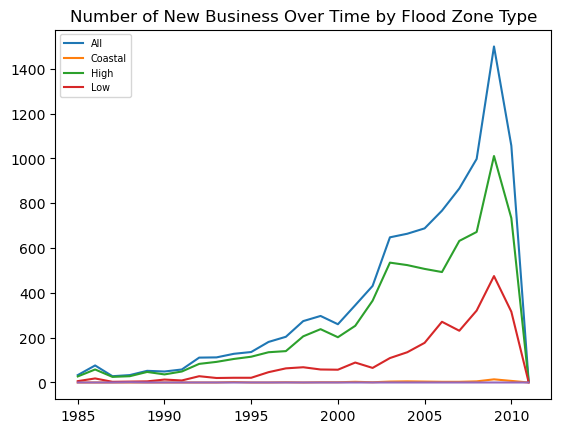

In [142]:
plt.plot(year_counts)
plt.plot(year_floodzone_counts)
plt.title("Number of New Business Over Time by Flood Zone Type")
floodzone_names = ['All', 'Coastal',  'High', 'Low']

plt.legend(floodzone_names, loc=0, fontsize='x-small')

The total number of new business increased over time in the dataset with the number of policies issued for high flood zones increasing slightly more compared to the other categories. 

#### Question 3
What is the relation between the state and flood zone categories?


In [ ]:
# Remove location outliers
long_df = df_sample[['longitude']]
Q1 = long_df.quantile(0.25)
Q3 = long_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bool_filter = ((long_df >= lower_bound) & (long_df <= upper_bound)).all(axis=1)
df_filtered = df_sample[bool_filter]

lat_df = df_sample[['latitude']]
Q1 = lat_df.quantile(0.25)
Q3 = lat_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


bool_filter = ((lat_df >= lower_bound) & (lat_df <= upper_bound)).all(axis=1)
df_filtered = df_filtered[bool_filter]

print(f"Dropped Policies: {df_sample.shape[0]-df_filtered.shape[0]}")


Dropped Policies: 63


C:\Users\hobbs\AppData\Local\Temp\ipykernel_21040\1527519439.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[bool_filter]


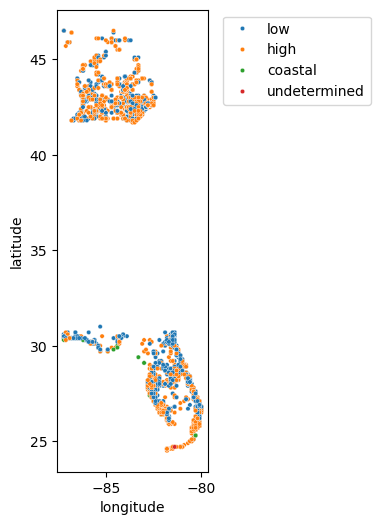

In [131]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_filtered,
    x='longitude',
    y='latitude',
    hue='floodzone_catagory',
    s=10
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [132]:
state_floodzone_counts_df = (
    df_filtered.groupby(['property_state', 'floodzone_catagory'])['property_state'].count().unstack('property_state')
)

state_floodzone_counts_df = round(state_floodzone_counts_df, ndigits= -1)

state_floodzone_counts_df.fillna(0)

property_state,FL,MI
floodzone_catagory,,
coastal,50.0,0.0
high,3410.0,3870.0
low,1510.0,1100.0
undetermined,0.0,0.0


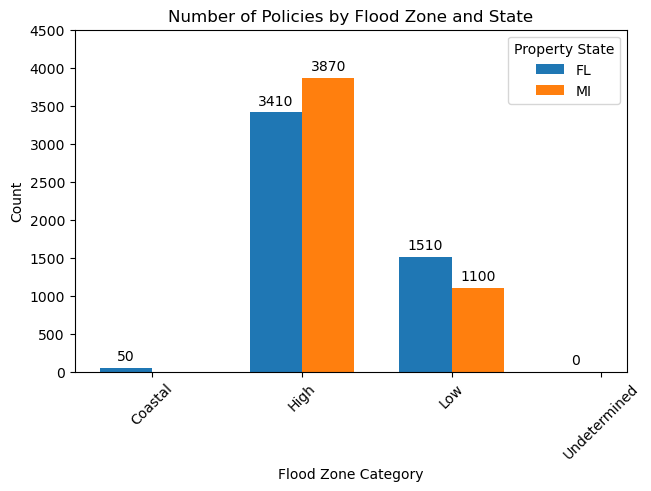

In [133]:
floodzone_names = ['Coastal',  'High', 'Low', 'Undetermined']
states = state_floodzone_counts_df.columns.tolist()

x = np.arange(len(floodzone_names))
width = 0.35
offset = 0
fig, ax = plt.subplots(layout='constrained')


for state, flood_count in state_floodzone_counts_df.items():
    p = ax.bar(x + offset, flood_count, width, label=state)
    ax.bar_label(p, padding=3)
    offset += width

ax.set_ylim(0,4500)
ax.set_title("Number of Policies by Flood Zone and State")
ax.set_xlabel("Flood Zone Category")
ax.set_ylabel("Count")
ax.set_xticks(x + width / 2, floodzone_names)
plt.xticks(rotation=45)
ax.legend(title="Property State")

plt.show()

In [134]:
state_floodzone_premium_df = (
    df_filtered.groupby(['property_state', 'floodzone_catagory'])['total_insurance_premium_of_the_policy']
    .mean().unstack('property_state')
)

state_floodzone_premium_df = round(state_floodzone_premium_df, ndigits= 2)

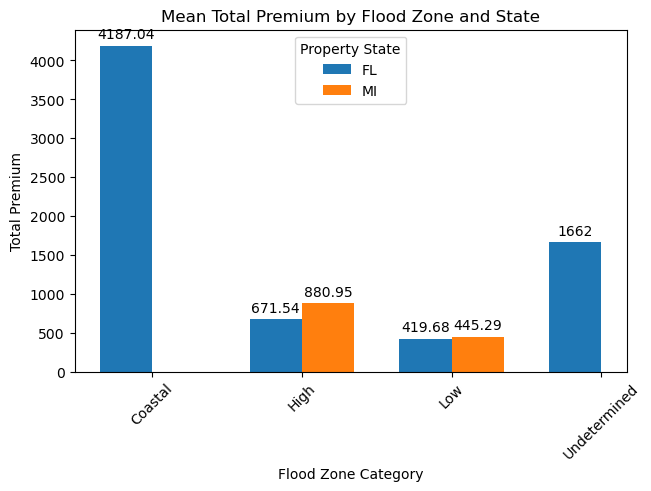

In [145]:
floodzone_names = ['Coastal',  'High', 'Low', 'Undetermined']
states = state_floodzone_premium_df.columns.tolist()

x = np.arange(len(floodzone_names))
width = 0.35

fig, ax = plt.subplots(layout='constrained')

i = 0
for state in states:
    offset = width * i
    measurements = state_floodzone_premium_df[state].values

    rects = ax.bar(x + offset, measurements, width, label=state)
    ax.bar_label(rects, padding=3)
    i += 1

ax.set_title("Mean Total Premium by Flood Zone and State")
ax.set_xlabel("Flood Zone Category")
ax.set_ylabel("Total Premium")
ax.set_xticks(x + width / 2, floodzone_names)
plt.xticks(rotation=45)
ax.legend(title="Property State")

plt.show()


In [136]:
state_floodzone_means_df = (
    df_filtered.groupby(['property_state', 'floodzone_catagory'])['premium_rate']
    .mean().unstack('property_state')
)

state_floodzone_means_df = round(state_floodzone_means_df, ndigits= 2)

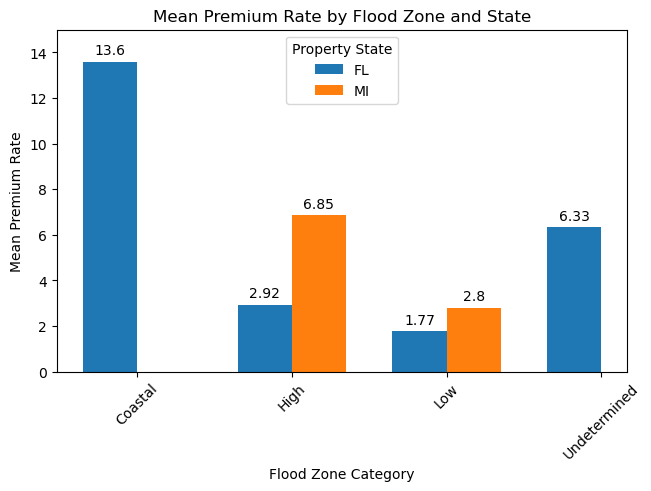

In [137]:
floodzone_names = ['Coastal',  'High', 'Low', 'Undetermined']
states = state_floodzone_means_df.columns.tolist()

x = np.arange(len(floodzone_names))
width = 0.35

fig, ax = plt.subplots(layout='constrained')

i = 0
for state in states:
    offset = width * i
    measurements = state_floodzone_means_df[state].values

    rects = ax.bar(x + offset, measurements, width, label=state)
    ax.bar_label(rects, padding=3)
    i += 1

ax.set_ylim(0,15)
ax.set_title("Mean Premium Rate by Flood Zone and State")
ax.set_xlabel("Flood Zone Category")
ax.set_ylabel("Mean Premium Rate")
ax.set_xticks(x + width / 2, floodzone_names)
plt.xticks(rotation=45)
ax.legend(title="Property State")

plt.show()


Florida has only a few policies in coastal flood zones and Michigan has more policies in high flood zones with less low/moderate flood zones. The premium rate and total premium for high flood zones were higher in Michigan than in Florida. 

#### Question 4
Is the difference in different flood zones premium rates between the two states statistically significant?

High flood zone and total insurance premium

In [138]:
mi_df = df_filtered[(df_filtered['property_state'] == 'MI') & (df_filtered['floodzone_catagory']=='high')]['total_insurance_premium_of_the_policy']
fl_df = df_filtered[(df_filtered['property_state'] == 'FL') & (df_filtered['floodzone_catagory']=='high')]['total_insurance_premium_of_the_policy']
t_statistic, p_value = stats.ttest_ind(mi_df, fl_df, equal_var=False)

print(f"T-statistic: {round(t_statistic,2)}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two samples.")

T-statistic: 10.82
P-value: 4.49304201531037e-27
Reject the null hypothesis: There is a significant difference between the means of the two samples.


High flood zone and premium rate

In [139]:
mi_df = df_filtered[(df_filtered['property_state'] == 'MI') & (df_filtered['floodzone_catagory']=='high')]['premium_rate']
fl_df = df_filtered[(df_filtered['property_state'] == 'FL') & (df_filtered['floodzone_catagory']=='high')]['premium_rate']
t_statistic, p_value = stats.ttest_ind(mi_df, fl_df, equal_var=False)

print(f"T-statistic: {round(t_statistic,2)}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two samples.")

T-statistic: 51.11
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the means of the two samples.


Low flood zone and total insurance premium

In [146]:
mi_df = df_filtered[(df_filtered['property_state'] == 'MI') & (df_filtered['floodzone_catagory']=='low')]['total_insurance_premium_of_the_policy']
fl_df = df_filtered[(df_filtered['property_state'] == 'FL') & (df_filtered['floodzone_catagory']=='low')]['total_insurance_premium_of_the_policy']
t_statistic, p_value = stats.ttest_ind(mi_df, fl_df, equal_var=False)

print(f"T-statistic: {round(t_statistic,2)}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two samples.")

T-statistic: 0.73
P-value: 0.4658282439102288
Fail to reject the null hypothesis: There is no significant difference between the means of the two samples.


Low flood zone and premium rate

In [148]:
mi_df = df_filtered[(df_filtered['property_state'] == 'MI') & (df_filtered['floodzone_catagory']=='low')]['premium_rate']
fl_df = df_filtered[(df_filtered['property_state'] == 'FL') & (df_filtered['floodzone_catagory']=='low')]['premium_rate']
t_statistic, p_value = stats.ttest_ind(mi_df, fl_df, equal_var=False)

print(f"T-statistic: {round(t_statistic,2)}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two samples.")

T-statistic: 12.85
P-value: 2.4258642116393878e-36
Reject the null hypothesis: There is a significant difference between the means of the two samples.


There is statistical significant between high, both total premium and premium rate, and low premium rate.

#### Question 5
Can we predict Premium amount based on other features to make suggestions for future policies?


In [140]:

X_raw = df_sample[rf_feature_cols]

X = pd.get_dummies(X_raw, drop_first=True)


y = df_sample['total_insurance_premium_of_the_policy'] 

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Fit Random Forest
rf_regressior = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_regressior.fit(X_train, y_train)


y_pred = rf_regressior.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

single_data = X_test.iloc[[0]]  
predicted_value = rf_regressior.predict(single_data)


print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")

print(f"RMSE: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Predicted Value: 702.54
Actual Value: 757.00
RMSE: 344.27
R-squared Score: 0.77


Using a reggression random forest we were able to predict total premium based on other features with a strong R-squared. 


### Conclusion

0. We visualized interesting relationships between the numerical variables.
0. The relationship between total building coverage and total premium to be moderately positively correlated.
1. The premium varies across different flood zones. 
2. There is a larger increase of high flood zones policies over time.
3. Different states have different premium rates and total premiums.
4. For high and low flood zones this difference is statistically significant in premium rate. For high flood zones there is also a difference in total premium.
5. We can predict total policy premium given other features using random forests.